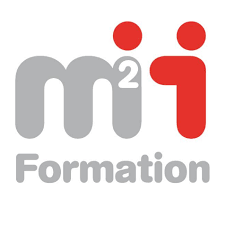

# Introduction

La production des visualisations "plots" est l'une des tâches les plus importantes en analyse de données. Elle peut faire partie de l'étape exploratoire, par exemple, pour aider à identifier les valeurs extrêmes "outliers", les transformations de données ou la génération d'idées pour les modèles. Pour d'autres, la production d'une visualisation interactive pour le web peut être l'objectif. 

Python possède plusieurs bibliothèques pour la production des visualisations statiques ou dynamiques, la plus utilisée est **matplotlib**.

La bibliothèque **matplotlib** a été conçue pour la création des graphiques(généralement 2D). Le projet a été démarré par John Hunter en 2002 afin de mettre en place une bibliothèque de graphiques semblable à celle de MATLAB. Les communautés IPython et matplotlib ont collaboré afin de simplifier la production des graphique depuis le shell IPython. matplotlib supporte plusieurs IHM sur tous les systèmes d'exploitation et peut exporter les graphiques vectoriels et raster (PDF, SVG, JPG, PNG, BMP, GIF, ...).

Plusieurs bibliothèques se basent sur matplotlib telles que seaborn. 

# API

Avec matplotlib, en utilise les conventions d'importation suivantes:

In [ ]:
pip install matplotlib  # Installation du package matplotlib

In [2]:
import matplotlib.pyplot as plt # La classe pyplot est la classe la plus utilisée du package

In [3]:
import numpy as np  # numpy ou Numerical Python est un package qui contient des fonctions mathématiques

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

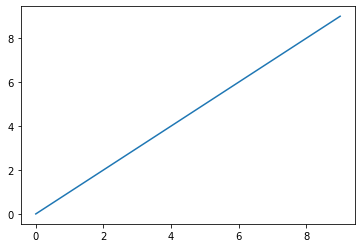

In [5]:
plt.plot(data)

In [22]:
plt.plot?

**Figures et Subplots**

Les tracés "plots" en matplotlib résident dans un objet Figure.
On peut créer une nouvelle figure avec plt.figure:

In [ ]:
fig = plt.figure(figsize=(500, 500))

Sur IPython, un tracé vide est affiché, alors que sur Jupyter, rien ne sera affiché jusqu'à l'utilisation d'autres commandes.

**plt.figure** a un certain nombre d'options, notamment, **figsize** qui garantie que la figure a une certaine taille lors de la sauvegarde sur le disque.

On ne peut pas créer un tracé avec une figure vide, on doit créer un ou plusieurs sous-tracés "subplots" en utilisant la fonction **add_subplot**:

In [8]:
ax1 = fig.add_subplot(2, 2, 1)

Ceci signifie que la figure se composer de 2 x 2 tracés et on a séléctionné le premier des 4 subplots.

In [9]:
ax2 = fig.add_subplot(2, 2, 2)

In [10]:
ax3 = fig.add_subplot(2, 2, 3)

Pour Jupyter, il faut mettre l'ensemble des commandes dans la même cellule.

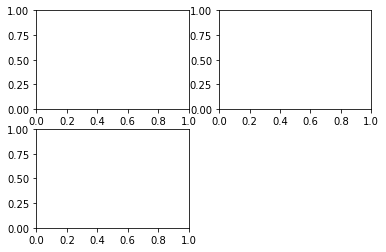

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

Une fois une commande telle que plt.plot([1.5, 3.5, -2, 1.6]) est exécutée, matplot dessine sur la dernière figure.

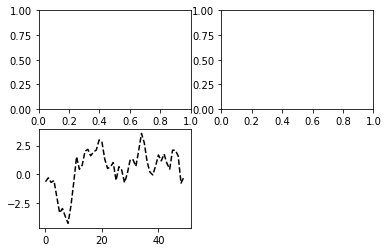

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

**NumPy**

NumPy est la bibliothèque numérique de python, elle contient plusieurs classes et fonctions mathématiques.

In [1]:
import numpy as np

In [10]:
np.random.binomial(n=6, p=1/6)

0

L'option 'k--' est une option de style qui permet de traçer une ligne noire discontinue. 

Les objets retournés par fig.add_subplot sont de type AxeSubplot, sur lesquels on peut directement traçer.

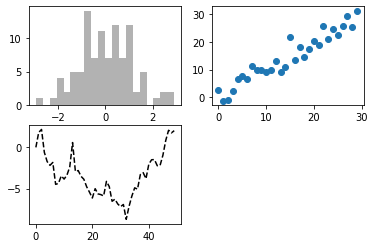

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))


La création d'une figure avec une grille de traçés est une tâche commune que matplot a crée une méthode plt.subplots qui crée la nouvelle figure et retourne un tableau NumPy contenant les sous-tracés crées.

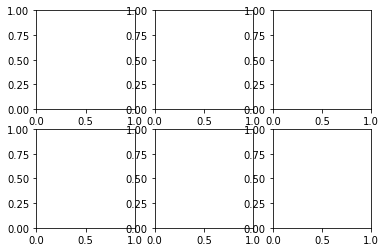

In [15]:
fig, axes = plt.subplots(2, 3)

In [16]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63f0c2af60>,
      dtype=object)

Cette méthode est très utile comme on peut indexer le tableau comme un tableau à deux dimensions. Par exemple, axes[0, 1]. On peut aussi indiquer si les sous-tracés doivent avoir les mêmes axes x ou y en utilisant sharex et sharey respectivement. C'est particulièrement utilise quand on compare les données en utilisant la même échelle.

> Argument | Description
> -- | --
> nrows | Nombre de lignes des sous-tracés
> ncols | Nombre de colonnes des sous-tracés
> sharex | Tous les sous-tracés utilisent la même échelle de l'axe x
> sharey |  Tous les sous-tracés utilisent la même échelle de l'axe y
> subplot_kw | Dictionnaire des mots clés passés à add_subplot
> **fig_kw | Mots clés additionnels utilisés lors de la création de la figure.

**Ajuster les espacements**

Par défaut, matplotlib laisse un certain remourrage "padding" aux alentours des sous-tracés et des espacements entre eux. Ces espacements sont relatifs à la largeur et à la longeur du tracé, si la fenêtre du tracé est redimensionnée manuellement ou automatiquement, le tracé s'ajuste dynamiquement. On peut changer l'espacement en utilisant la méthode subplots_adjust de l'objet Figure:



```
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
```



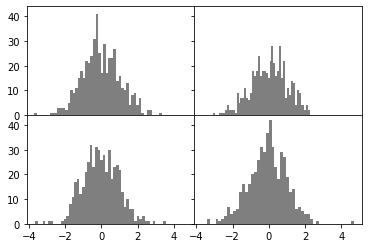

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
  for j in range(2):
    axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

**Couleurs, Marquers et Styles de lignes**

La fonction principale de matplotlib "plot" accepte des tableaux de coordonnés x et de y et optionnellement une abreviation sous forme de chaîne de caractères indiquant la couleur et le style de la ligne. Par exemple, pour tracer $y = \mathcal{f(x)}$ avec une ligne discontinue en vert, on peut exécuter:

```
ax.plot(x, y, 'g--')
```

La syntaxe équivalente est:

```
ax.plot(x, y, linestyle='--', color='g')
```

Un nombre d'abréviations de couleurs sont fournies pour les couleurs communes, mais on peut utiliser n'importe quelle couleur du spectrum en utilisant le code hexadécimal ('#CECECE'), on peut afficher la liste complète des styles de lignes en utilsant plot?.


In [11]:
from matplotlib.pyplot import plot

In [12]:
plot?

Les lignes peuvent avoir des marqueurs pour surligner les points de données. Quand la ligne tracée est continue suite à l'interpolation, les points ne peuvent pas être distingués. Le marqueur peut être précisé dans la chaîne de style où la couleur doit être suivie du type de marqueur et du style de la ligne.

In [6]:
from numpy.random import randn

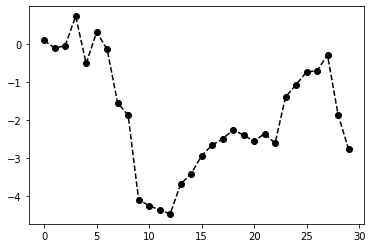

In [7]:
plt.plot(randn(30).cumsum(), 'ko--')

D'une manière plus explicite:

In [9]:
from matplotlib.pyplot import plot

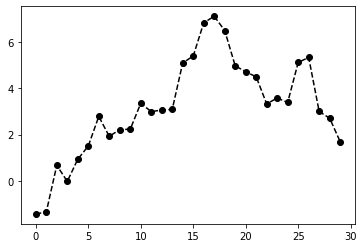

In [10]:
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

Pour les tracés de lignes, on peut remarquer que certains points sont interpolés par défaut. Ceci peut être modifié avec l'option **drawstyle**.

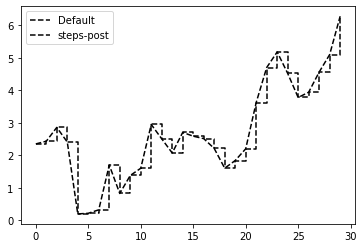

In [17]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')